# Figure S8

Code to generate Figure S8 in Nyquist et al 2022

In [45]:
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sys
sys.path.insert(0,"../helper_functions")
import plotting_helpers as ph
import bm_data_functions as bm

In [3]:
plots_dir = "../../Results/plots/fig_S8/"

In [9]:
adata_all_epi = sc.read_h5ad("../../Data/processed_data/all_timepoints/adata_epithelial_no_doublets_FINAL.h5ad")

epi_sub_colors={"Cycling Lactocytes": "#350F6C","KRT high lactocytes 1":"#D3C0EC", 
               "KRT high lactocytes 2": "#771856","LC1":'#9986A5', ##6E398F
                "MT High Secretory Lactocytes":"#8D0BDE","Secretory Lactocytes":'#bb99ff'} #"#C179ED""#C3AED1"
bm.set_colors_from_dict(adata_all_epi,epi_sub_colors,"Epithelial Cell Subclusters")

In [10]:
sc.tl.leiden(adata_all_epi,resolution=0.3,key_added="leiden_res0.3")
sc.tl.leiden(adata_all_epi,resolution=0.5,key_added="leiden_res0.5")
sc.tl.leiden(adata_all_epi,resolution=0.7,key_added="leiden_res0.7")
sc.tl.leiden(adata_all_epi,resolution=0.9,key_added="leiden_res0.9")
sc.tl.leiden(adata_all_epi,resolution=1.0,key_added="leiden_res1.0")
sc.tl.leiden(adata_all_epi,resolution=1.2,key_added="leiden_res1.2")

[<AxesSubplot:title={'center':'leiden_res0.3'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot:title={'center':'leiden_res0.5'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot:title={'center':'leiden_res0.7'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot:title={'center':'leiden_res0.9'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot:title={'center':'leiden_res1.0'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot:title={'center':'leiden_res1.2'}, xlabel='UMAP1', ylabel='UMAP2'>]

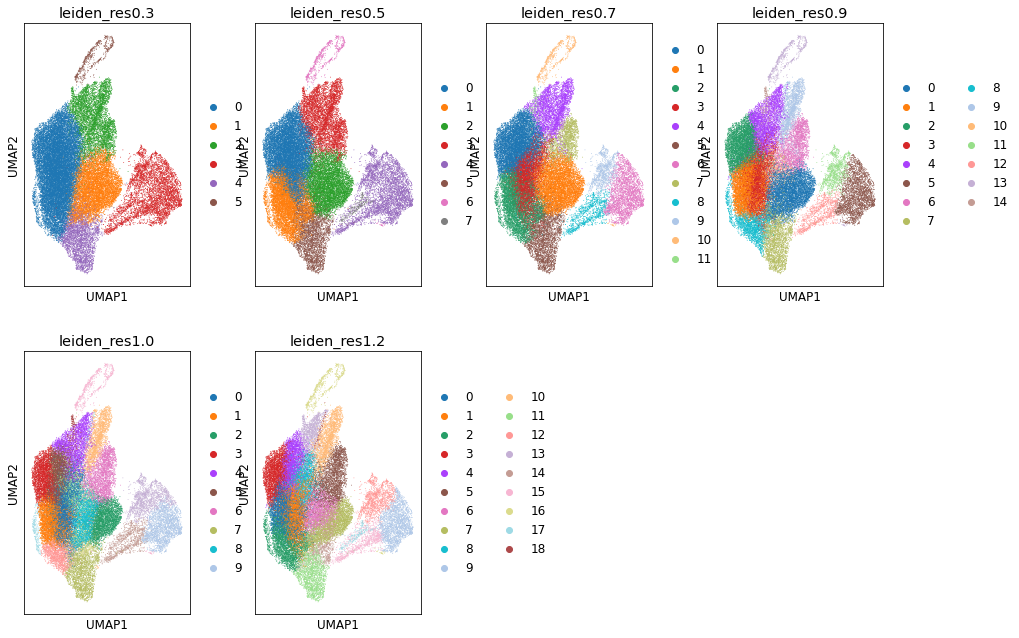

In [13]:
sc.pl.umap(adata_all_epi,color=["leiden_res0.3","leiden_res0.5","leiden_res0.7","leiden_res0.9","leiden_res1.0","leiden_res1.2"],show=False)


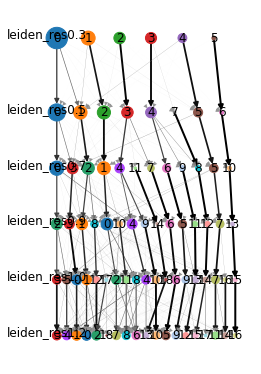

In [16]:
plt.rcParams["figure.figsize"]=(3,5)
plt.rcParams['font.size']= 12
reslist = ["leiden_res0.3","leiden_res0.5","leiden_res0.7","leiden_res0.9","leiden_res1.0","leiden_res1.2"]
y_vals = dict(zip(reslist,[18,14,11,8,5,2]))
orders={"leiden_res0.3":[0,1,2,3,4,5],"leiden_res0.5":[0,1,2,3,4,7,5,6],"leiden_res0.7":[0,3,2,1,4,11,7,6,9,8,5,10],"Epithelial Subclusters":['Secretory Lactocytes', 'KRT high lactocytes 1','KRT high lactocytes 2','Luminal Epithelial','MT High Secretory Lactocytes','Cycling Lactocytes'],
           "leiden_res1.0":[3,5,0,1,12,17,2,11,8,4,10,18,6,9,13,14,7,16,15],#[3,5,0,1,12,17,2,11,8,4,10,6,18,9,13,7,16,15,14],
           "leiden_res1.2":[3,4,1,0,2,18,7,8,6,13,10,5,9,12,15,17,11,14,16],
           "leiden_res0.9":[2,3,1,8,0,10,4,9,14,6,5,11,12,7,13]}
for o,l in orders.items():
    orders[o] = [str(i) for i in l]
ph.draw_clustergraph(adata_all_epi, reslist,y_vals,orders)
plt.savefig(plots_dir+"epi_clustering_tree.pdf",bbox_inches="tight")

# Figure S8B

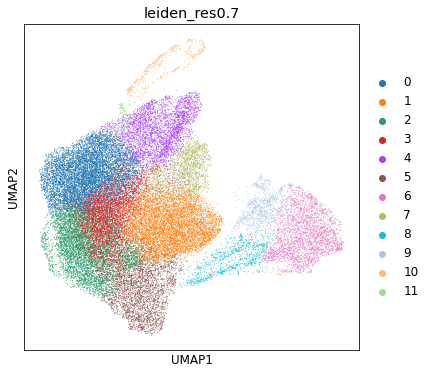

In [18]:
plt.rcParams["figure.figsize"]=(6,6)
sc.pl.umap(adata_all_epi,color="leiden_res0.7",show=False)
plt.savefig(plots_dir+"leiden_umap.png", bbox_inches="tight")

# Figure S8C

In [23]:
donor_colors = pd.read_csv("../helper_functions/donor_colors.csv")
donor_colors["num"]= donor_colors.index
donor_colors.index = donor_colors["donor"]
bm.set_colors_from_dict(adata_all_epi,{d:donor_colors.loc[d,"color"] for d in adata_all_epi.obs["donor"].unique()},"donor")

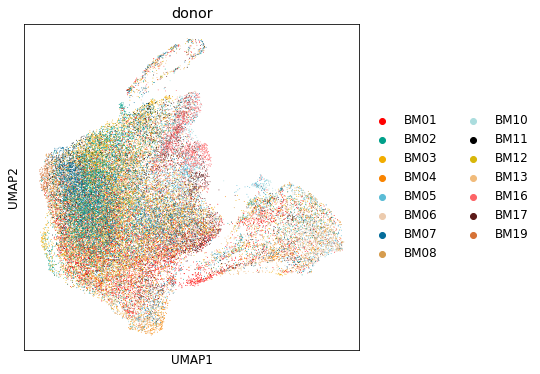

In [24]:
sc.pl.umap(adata_all_epi,color="donor",show=False)
plt.savefig(plots_dir+"donor_umap.png", bbox_inches="tight")

# Figure S8D

In [29]:
# Calculate cell cycle scores
g1s=list(i[0].strip() for i in pd.read_csv("../helper_functions/tirosh_g1s.txt").values)
g2m=list(i[0].strip() for i in pd.read_csv("../helper_functions/tirosh_g2m.txt").values)
sc.tl.score_genes_cell_cycle(adata_all_epi,s_genes=g1s,g2m_genes=g2m)

/afs/csail.mit.edu/u/n/nyquist/anaconda3/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'phase' as categorical


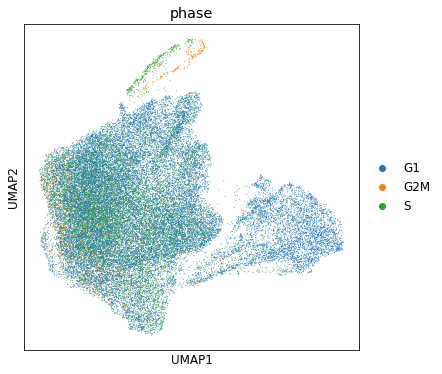

In [30]:
# Plot umap of cell cycle scores
s=sc.pl.umap(adata_all_epi,color="phase",show=False)
plt.savefig(plots_dir+"cell_cycle_phase_umap.png",bbox_inches="tight")

# Figure S8E

Stacked bar by leiden cluster

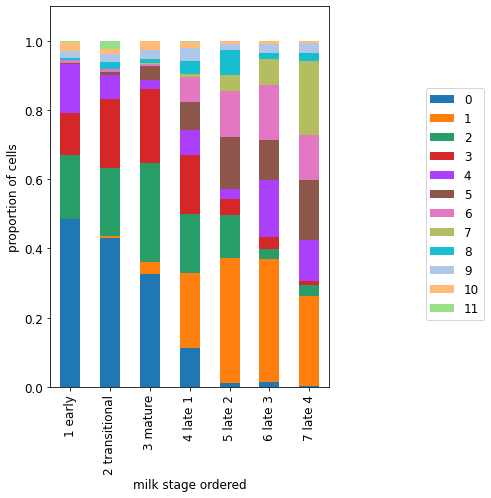

In [25]:
ph.normalized_stacked_bar_plot(adata_all_epi, "milk stage ordered","leiden_res0.7")
plt.savefig(plots_dir+"leiden_stacked_bar.pdf", bbox_inches="tight")

# Figure S8F

Stacked bar by celltype

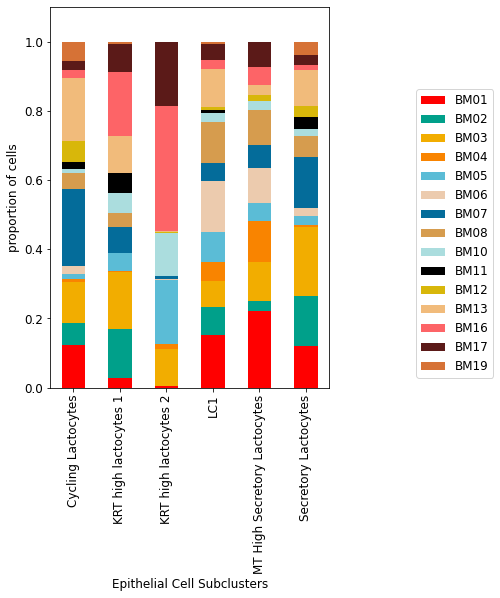

In [31]:
ph.normalized_stacked_bar_plot(adata_all_epi, "Epithelial Cell Subclusters","donor")
plt.savefig(plots_dir+"leiden_stacked_bar.pdf", bbox_inches="tight")

# Figure S8G

supervised marker genes

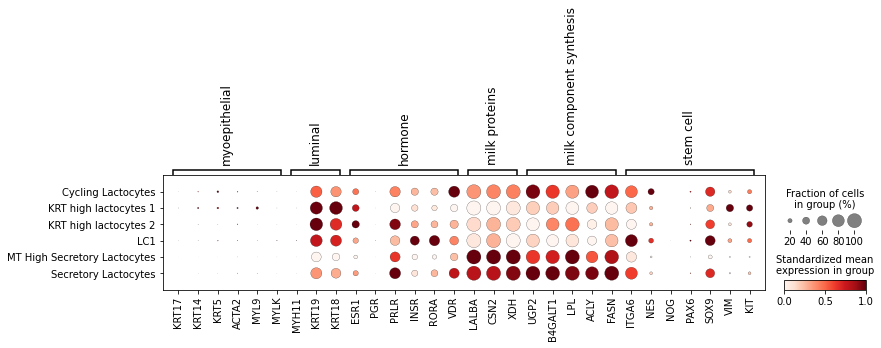

In [32]:
supervised_genes = {"myoepithelial":["KRT17","KRT14","KRT5","ACTA2","MYL9","MYLK"],
"luminal":["MYH11","KRT19","KRT18"],
"hormone":["ESR1","PGR","PRLR","INSR","RORA","VDR"],
 "milk proteins":["LALBA","CSN2","XDH"],
 "milk component synthesis":["UGP2","B4GALT1","LPL","ACLY","FASN"],
 "stem cell":["ITGA6", "NES", "NOG", "PAX6", "SOX9", "VIM","KIT"]}

sc.pl.dotplot(adata_all_epi,supervised_genes,groupby="Epithelial Cell Subclusters",standard_scale="var",colorbar_title='Standardized mean\nexpression in group',show=False)
plt.savefig(plots_dir+"supervised_genes_by_subclusters_dotplot.pdf",bbox_inches="tight")


# Figure S8H

Mitochondrial percent

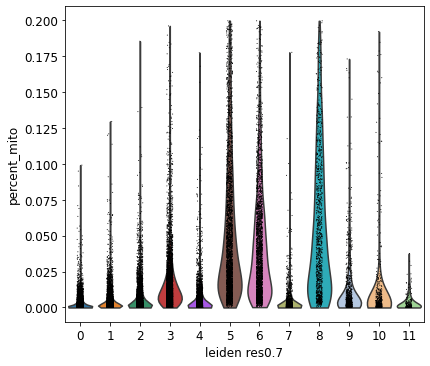

In [33]:
sc.pl.violin(adata_all_epi, "percent_mito",groupby="leiden_res0.7",show=False)
plt.savefig(plots_dir+"percent_mito_leiden_violin.pdf", bbox_inches="tight")

# Figure S8I

mitochondiral percent by cluster

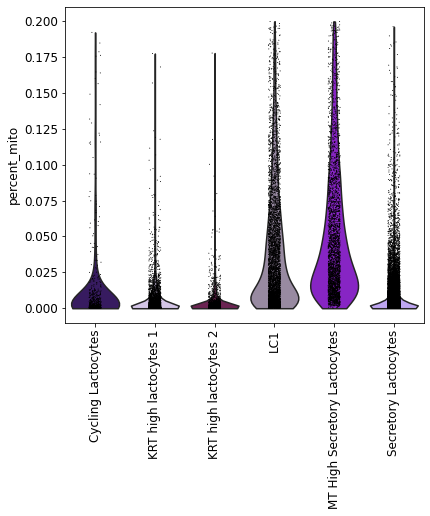

In [35]:
sc.pl.violin(adata_all_epi, "percent_mito",groupby="Epithelial Cell Subclusters",show=False,rotation=90)
plt.savefig(plots_dir+"percent_mito_epi_cluster_violin.pdf", bbox_inches="tight")

# Figure S8J

Leiden pseudobulk marker genes

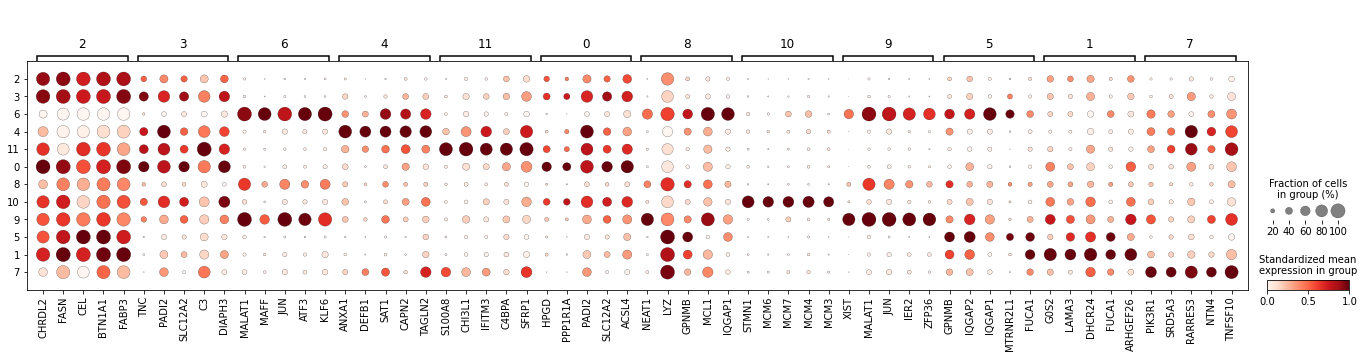

In [38]:
# Marker genes plot
# code to generate marker genes similar to  Pseudobulk_Differential_Expression.ipynb notebook
epi_pseudobulk_markers_folder = "../../Results/tables/Epithelial_Leiden_Pseudobulk_Marker_Genes/"


#sc.tl.rank_genes_groups(adata_all_epi, groupby="leiden_res0.7",pts=True) # this command calculates the percent of cells expressing so we don't have to

filtered_degenes = {}

for c in adata_all_epi.obs["leiden_res0.7"].unique():
    # read in pseudobulk
    pseudobulk = pd.read_csv(epi_pseudobulk_markers_folder+"cluster_ "+c+" _marker_genes_pseudobulk.csv",index_col=0)
    overlap_genes = list(set(pseudobulk.index).intersection(adata_all_epi.uns["rank_genes_groups"]["pts"].index))
    pseudobulk.loc[overlap_genes, "pts"] = adata_all_epi.uns["rank_genes_groups"]["pts"].loc[overlap_genes,c]
    pseudobulk.loc[overlap_genes, "pts_rest"] = adata_all_epi.uns["rank_genes_groups"]["pts_rest"].loc[overlap_genes,c]
    pseudobulk["pts_difference"] = pseudobulk["pts"]-pseudobulk["pts_rest"]
    
    
    # filtering happens here:
    filtered_degenes[c] = pseudobulk[(pseudobulk["padj"]<0.05)&(pseudobulk["pts"] > .3)&(pseudobulk["log2FoldChange"] > .4)]
    
    # save results to file
    pseudobulk.to_csv(epi_pseudobulk_markers_folder+"marker_genes_with_pcts/"+c.replace(" ","_").replace("/","_")+"_pseudobulk_marker_genes.csv")
    filtered_degenes[c].sort_values("pts_difference",ascending=False).to_csv(epi_pseudobulk_markers_folder+"marker_genes_with_pcts/filtered_"+c.replace(" ","_").replace("/","_")+"_pseudobulk_marker_genes.csv")
    
  
cluster_markers = {}
for c in adata_all_epi.obs["leiden_res0.7"].unique():
    cluster_markers[c] = filtered_degenes[c].sort_values("pts_difference",ascending=False).head(5).index
    
sc.pl.dotplot(adata_all_epi,cluster_markers,groupby="leiden_res0.7",categories_order = cluster_markers.keys(),show=False,standard_scale="var",colorbar_title='Standardized mean\nexpression in group')

plt.savefig(plots_dir+"leiden_pseudobulk_marker_genes_top5.pdf",bbox_inches="tight")


# Figure S8K

In [39]:
sample_counts = adata_all_epi.obs.groupby(["sample","Epithelial Cell Subclusters"]).count()["milk stage ordered"].unstack()
props=sample_counts.divide(sample_counts.sum(axis=1),axis=0)
sample_meta = bm.get_bm_metadata()
props=props.fillna(0)

In [42]:
from scipy.stats import entropy
sample_meta["epi entropy"] = np.nan
sample_meta["milk stage ordered"]= ""
for s in sample_meta.index:
    sample_meta.loc[s,"epi entropy"]=entropy(props.loc[s])
    sample_meta.loc[s, "milk stage ordered"]=adata_all_epi.obs.loc[adata_all_epi.obs["sample"]==s,"milk stage ordered"].unique()[0]

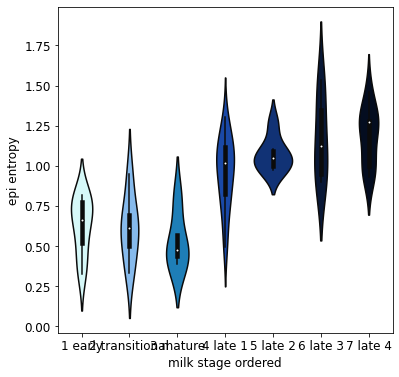

In [46]:
sns.violinplot(data=sample_meta,x="milk stage ordered",y="epi entropy", palette={i:donor_colors.loc[i,"color"] for i in sample_meta["milk stage ordered"].unique()})
plt.savefig(plots_dir+"epi_entropy_violin.pdf",bbox_inches="tight")